In [1]:
# Basic analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100 # See all of the columns when DFs are displayed

# Generate the DataFrame with the new ranking
from X_ranking import *
from priority_tools import *

# Plotting (with fancy font/backend output)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For high quality figures

%load_ext autoreload
%autoreload 2

In [2]:
# Get the inital SC3 dataframe that was used as the basis for the picks
sc3_init_df_path = 'data/TKS/tks_output/sc3_init_target_list.csv'
sc3_init_df = pd.read_csv(sc3_init_df_path)
print('SC3 init df columns: {}'.format(sc3_init_df.columns.tolist()))
print('----------')

# Get the df with all of the picks
picks_df_path = 'data/TKS/tks_output/program_overlap.csv'
picks_df = pd.read_csv(picks_df_path)

selected_TOIs = pd.read_csv('data/TKS/selected_TOIs.csv')
pick_tois_df = picks_df.merge(selected_TOIs, on='tic')#.drop_duplicates(subset='tic')
print('Program overlap df columns: {}'.format(picks_df.columns.tolist()))
print(len(pick_tois_df))

SC3 init df columns: ['radius_bin', 'insol_bin', 'st_Teff_bin', 'Full TOI ID', 'Planet Radius Value', 'Orbital Period Value', 'Effective Temperature Value', 'Effective Stellar Flux Value', 'Planet Equilibrium Temperature (K) Value', 'V mag', 'K_amp', 'TSM', 't_HIRES', 'X', 'TSM_Vmag_priority', 'X_priority', 'toi', 'tic', 'cps', 'disp', 'vetting', 'ao_vet', 'hires_prv', 'apf_prv', 'vip_rank']
----------
Program overlap df columns: ['tic', 'toi', 'priority', 'in_SC1A', 'in_SC1B', 'in_SC1C', 'in_SC1D', 'in_SC1E', 'in_SC2A', 'in_SC2Bi', 'in_SC2Bii', 'in_SC2C', 'in_SC3', 'in_SC4', 'in_TOA', 'in_TOB', 'total_programs']
119


In [3]:
# Get just the targets picked by SC3
sc3_picks_df = picks_df[picks_df['in_SC3'] == 'X']
sc3_picks_df.head()

,tic,toi,priority,in_SC1A,in_SC1B,in_SC1C,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB,total_programs
1,352413427,1473,2,-,X,-,-,X,-,X,X,-,X,-,-,X,6
4,98796344,455,5,X,X,-,X,X,-,X,X,-,X,-,-,X,8
6,453211454,509,7,-,X,-,-,X,-,X,X,-,X,-,-,X,6
8,408636441,1759,9,-,X,-,X,-,-,-,-,-,X,-,-,X,4
9,142276270,1136,10,-,X,-,-,X,-,X,X,X,X,-,-,X,7


In [4]:
# Merge the sc3_init_df with sc3_picks_df
sc3_df = sc3_init_df.merge(sc3_picks_df.drop(['toi'], axis=1), on='tic').rename({'priority':'pick_num'}, axis=1)
sc3_df.head()

,radius_bin,insol_bin,st_Teff_bin,Full TOI ID,Planet Radius Value,Orbital Period Value,Effective Temperature Value,Effective Stellar Flux Value,Planet Equilibrium Temperature (K) Value,V mag,K_amp,TSM,t_HIRES,X,TSM_Vmag_priority,X_priority,toi,tic,cps,disp,vetting,ao_vet,hires_prv,apf_prv,vip_rank,pick_num,in_SC1A,in_SC1B,in_SC1C,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB,total_programs
0,1,2,1,455.01,1.368307,5.358807,3562.0,7.379879,420.370338,10.59,2.245208,43.269585,4148.751314,0.010430,NaN,2.0,455.01,98796344,GJ3193,VP,passed,passed,yes,no,2.0,5,X,X,-,X,X,-,X,X,-,X,-,-,X,8
1,1,3,1,1468.02,1.452351,1.880305,3382.0,35.733782,623.576148,12.50,2.797071,14.536522,15524.717981,0.000936,NaN,NaN,1468.02,243185500,T001468,VPC,passed,NaN,yes,NaN,NaN,19,X,-,-,X,-,-,-,-,X,X,-,-,-,4
2,2,2,1,1468.01,2.333273,15.531925,3382.0,2.140013,308.477758,12.50,3.097830,88.323028,12656.556228,0.006978,NaN,2.0,1468.01,243185500,T001468,VPC,passed,NaN,yes,NaN,NaN,19,X,-,-,X,-,-,-,-,X,X,-,-,-,4
3,1,3,1,1730.02,1.440684,2.155669,3691.0,67.449404,730.910630,12.23,2.026155,9.243456,23072.015245,0.000401,NaN,NaN,1730.02,318022259,HIP34730,PC,passed,passed,NaN,NaN,NaN,42,X,-,-,-,-,-,-,-,X,X,-,-,-,3
4,2,3,1,1730.01,2.299128,6.222236,3691.0,16.411904,513.345186,12.23,3.149984,79.047707,9545.839154,0.008281,1.0,1.0,1730.01,318022259,HIP34730,PC,passed,passed,NaN,NaN,NaN,42,X,-,-,-,-,-,-,-,X,X,-,-,-,3


In [5]:
# Save the above dataframe to file
# sc3_df.to_csv('data/TKS/tks_output/sc3_output_df.csv', index=False)

/Users/josephmurphy/Documents/UCSC/research/2019-20/tks_target_shared/priority_tools.py:621: PerformanceWarning: indexing past lexsort depth may impact performance.
  size = len(binned_data.loc[rbin,f,t])


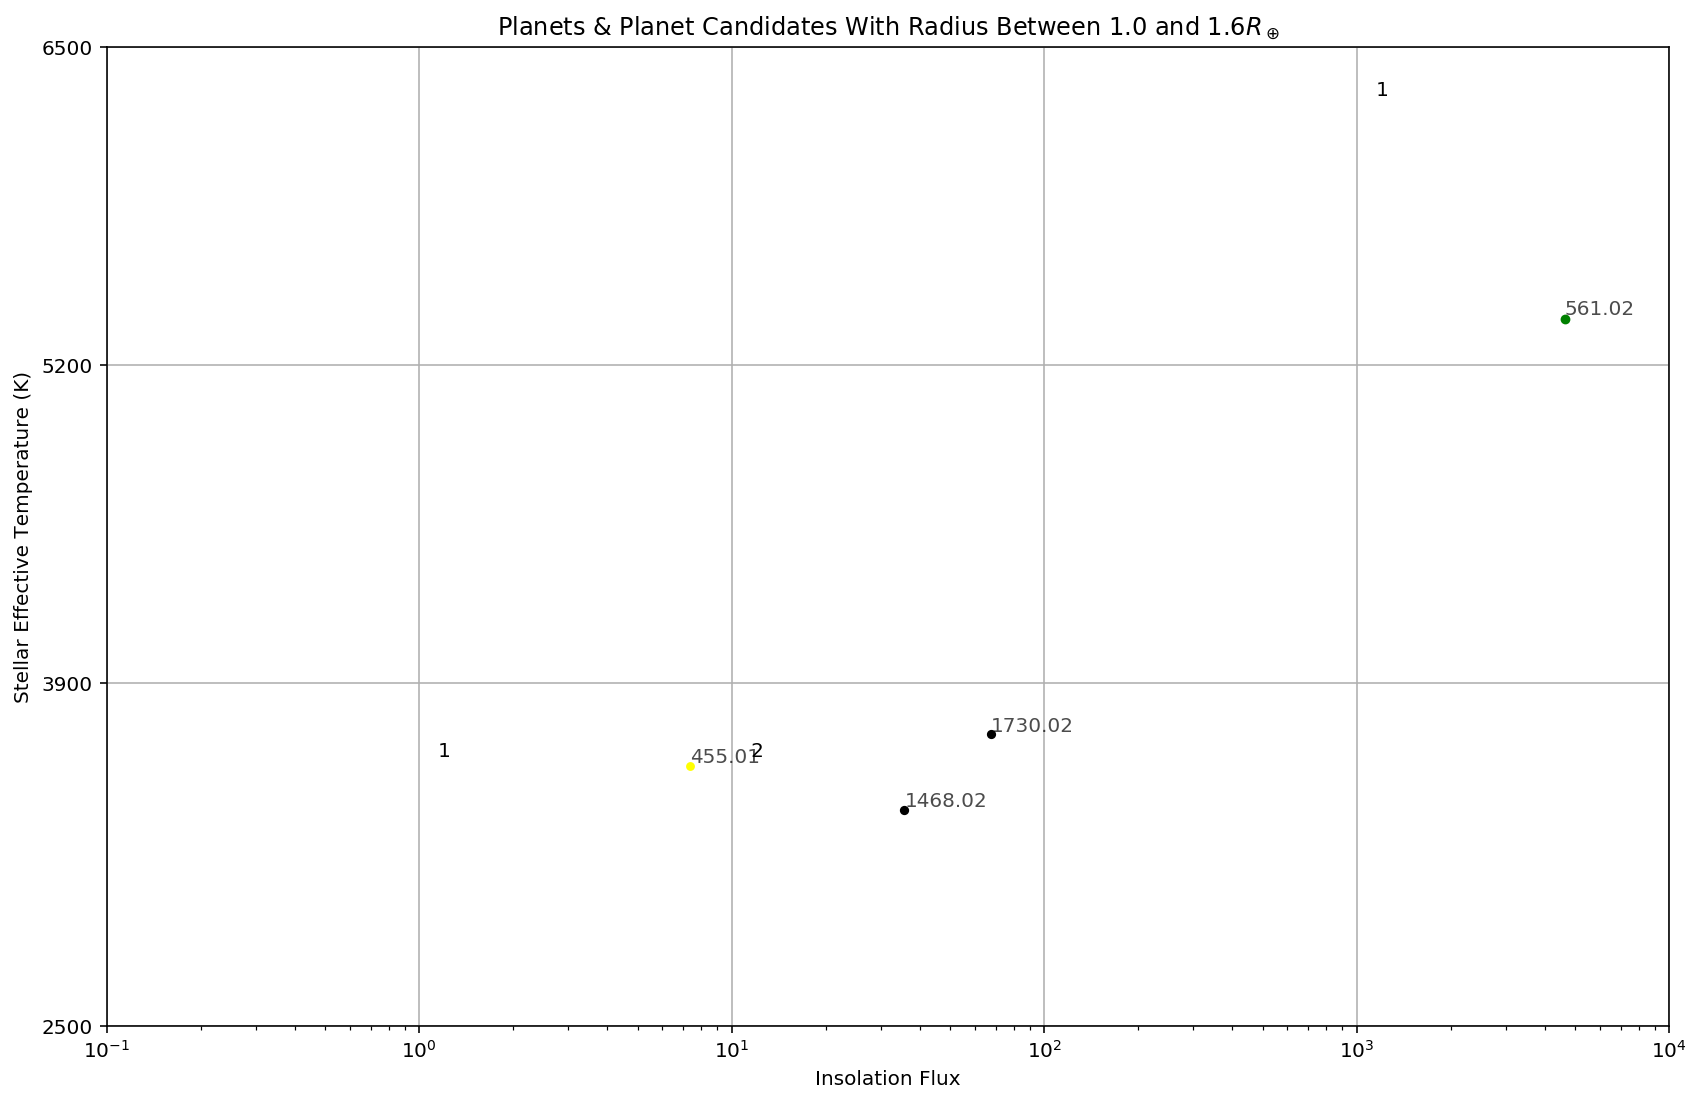

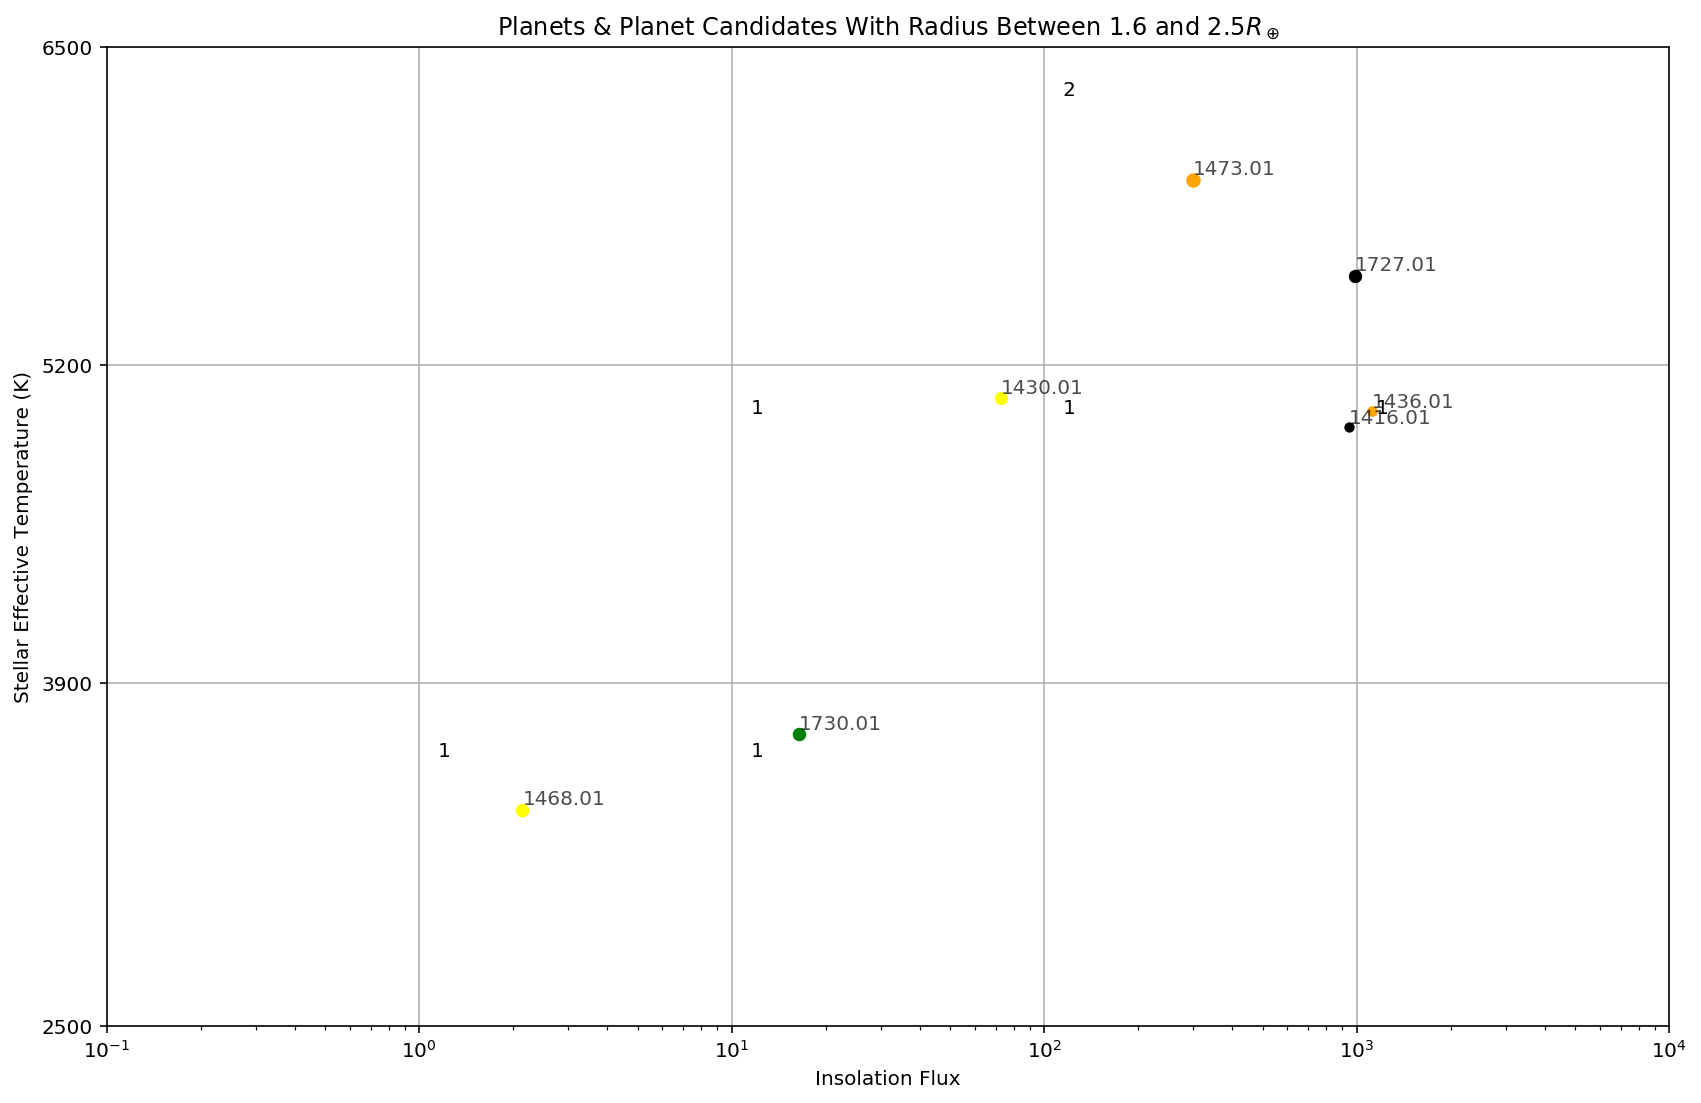

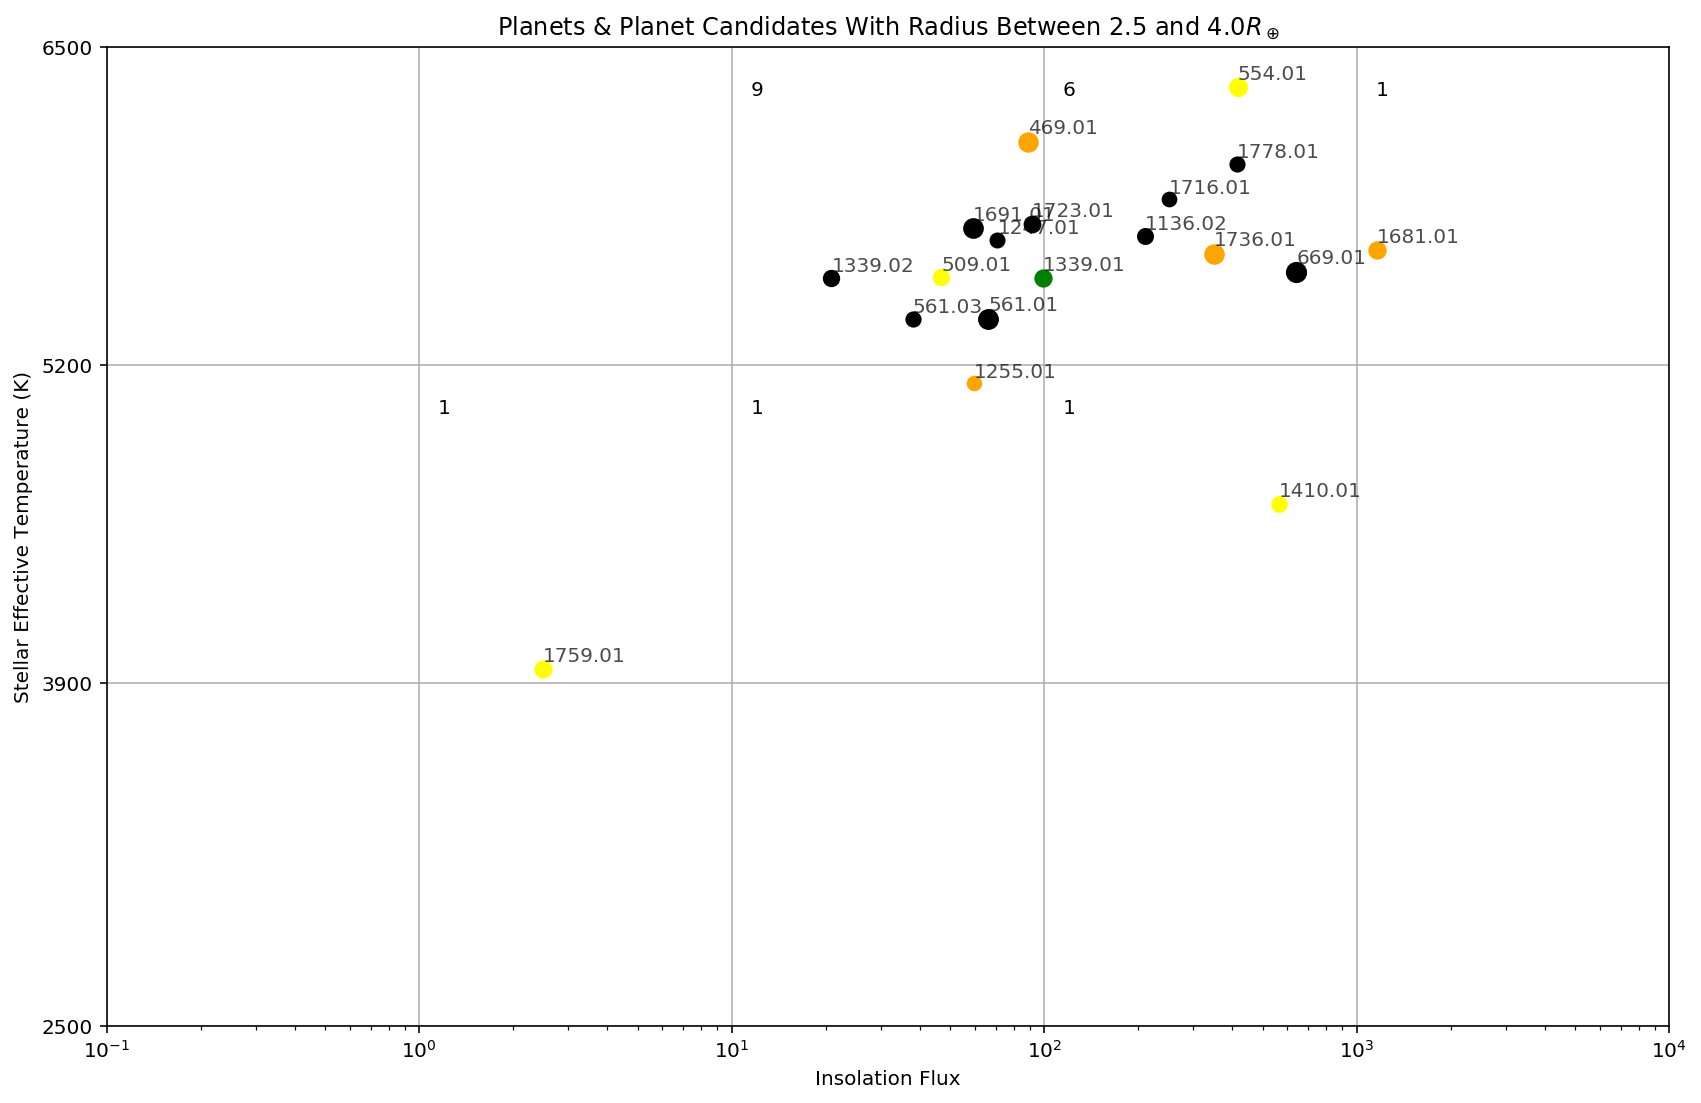

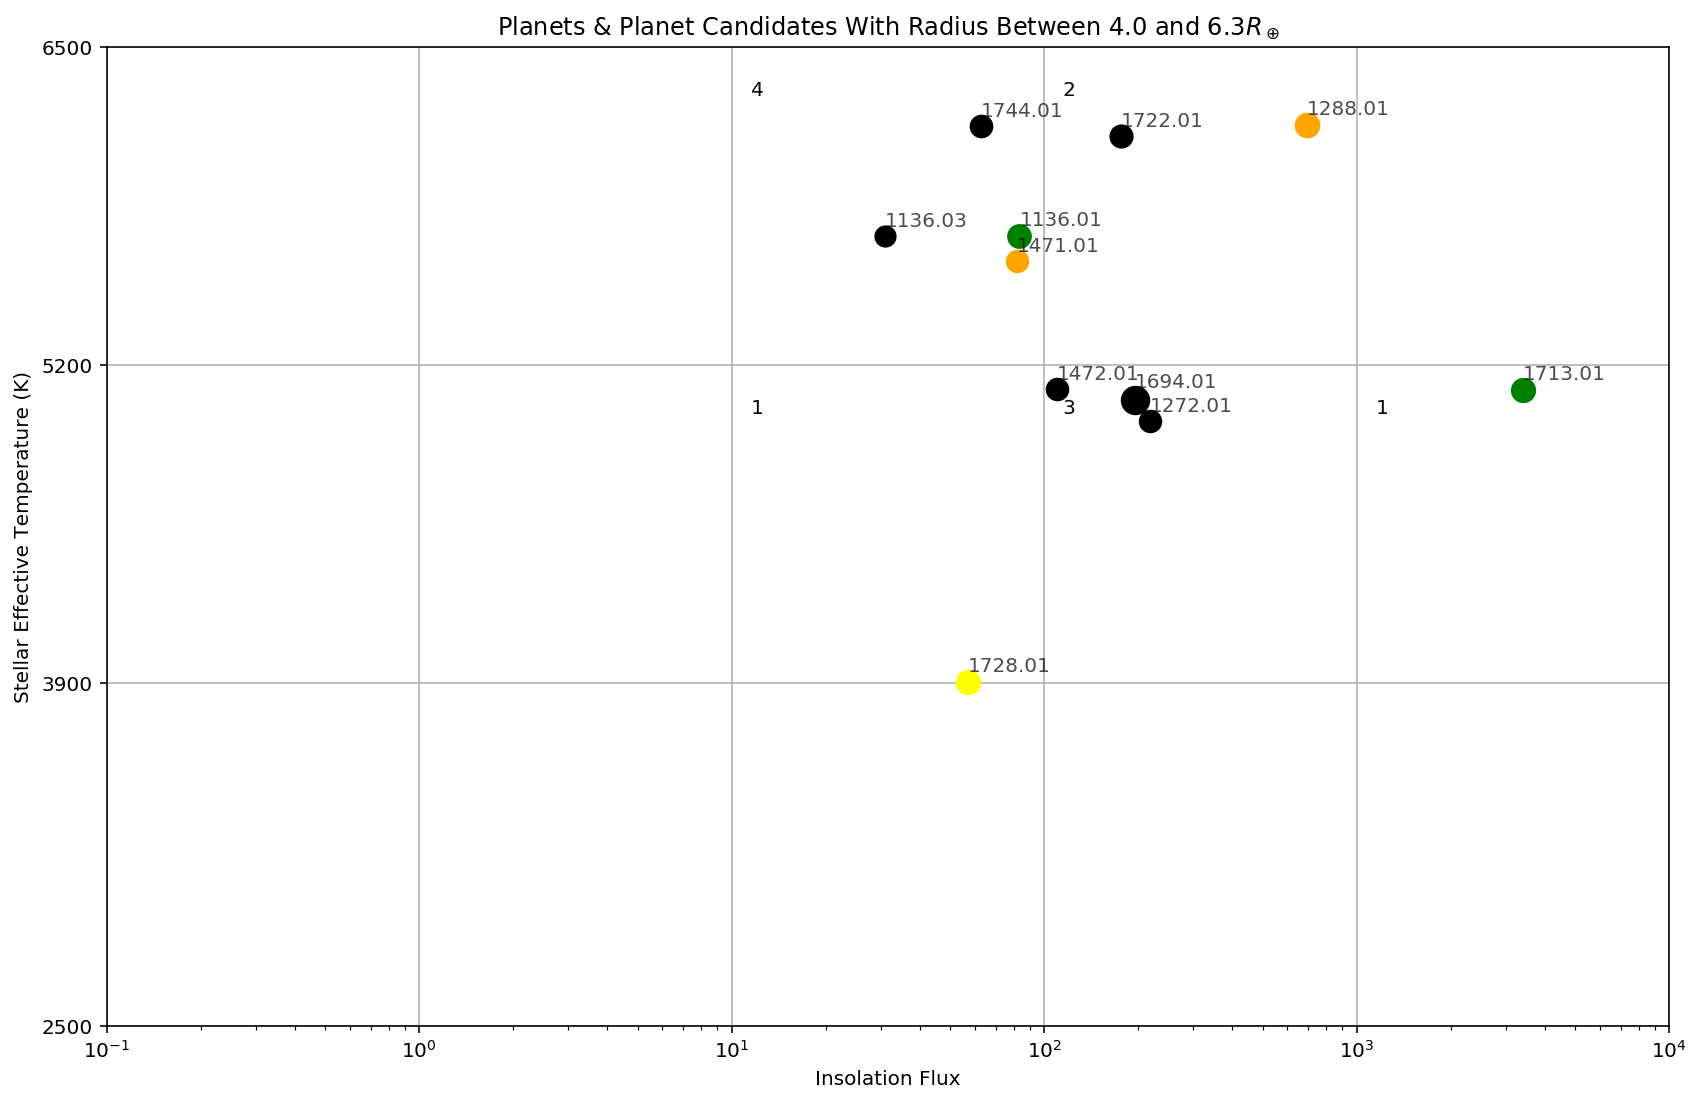

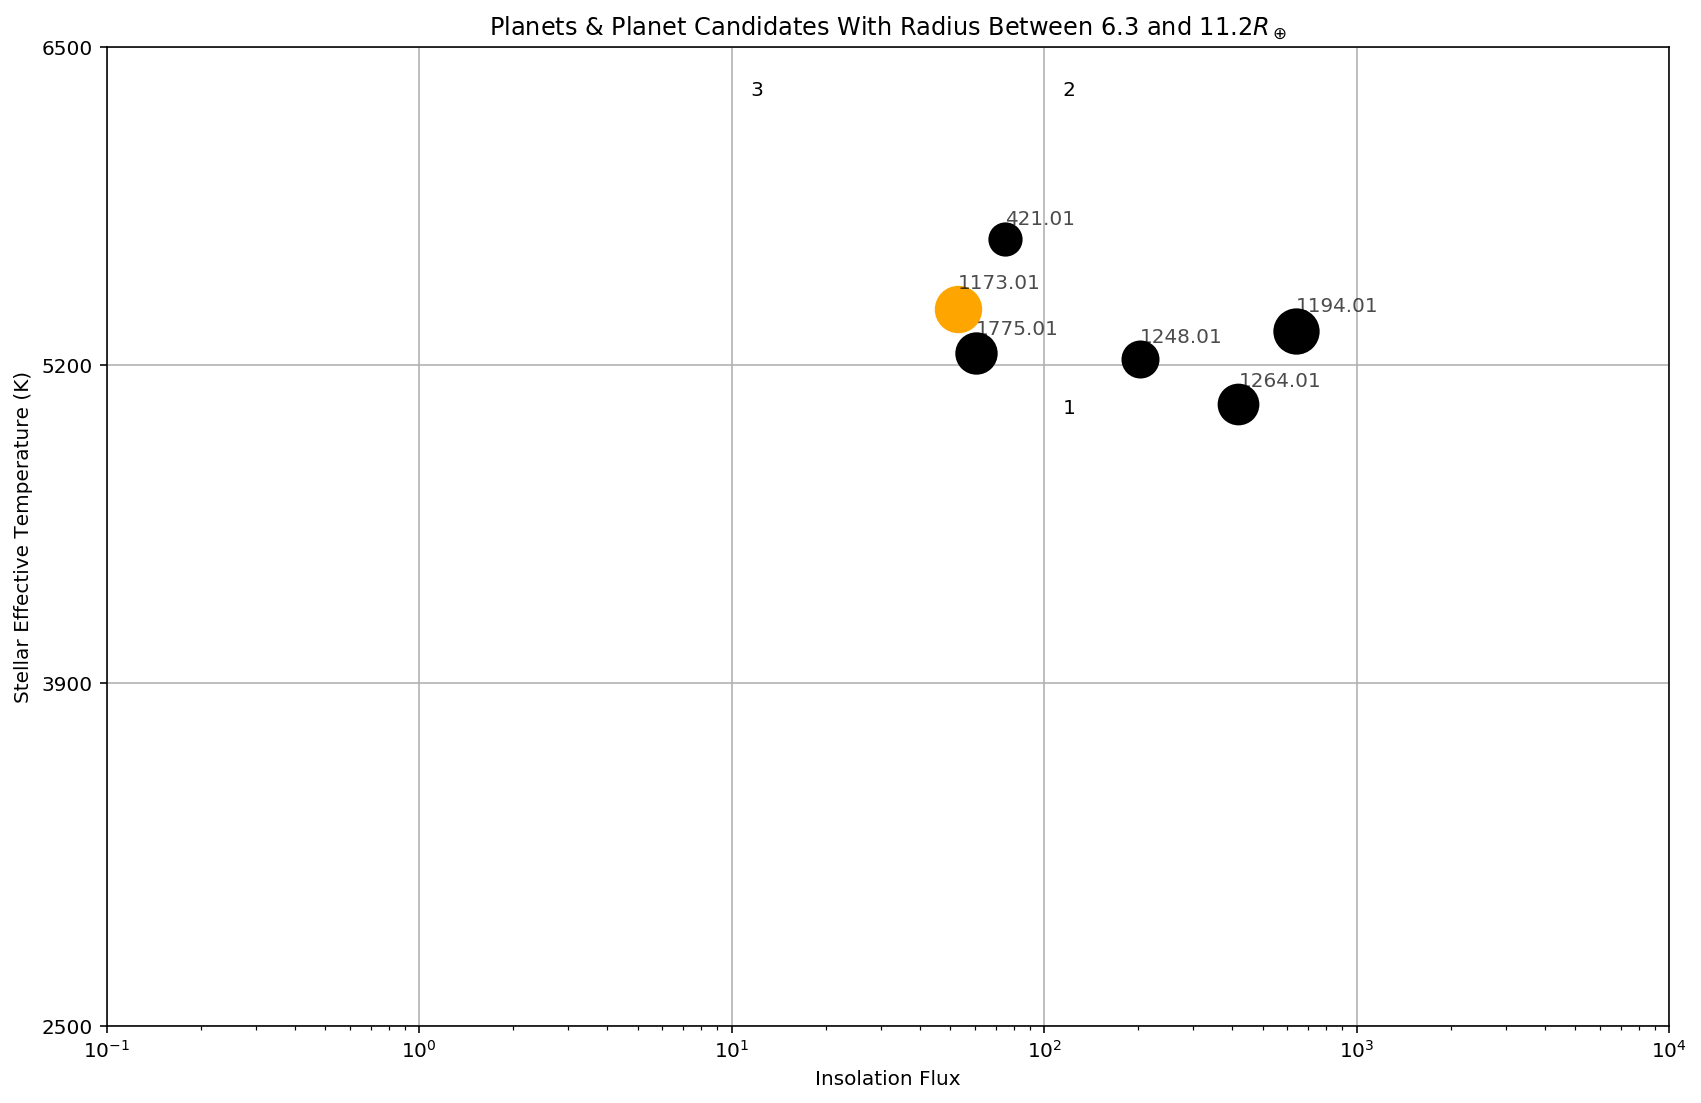

In [6]:
rad_bins = 10**(np.linspace(0,1,6)) 
rad_bins[-1] = 11.2 #want to include up to Jupiter radius 
fpl_bins = 10**(np.linspace(-1,4,6))
tef_bins = np.array([2500,3900,5200,6500])
bins = [rad_bins, fpl_bins, tef_bins]

fig_ax_list = []
for i in np.arange(1,6):
    curr_fig_ax = bin_plotter(sc3_df.set_index(['radius_bin', 'insol_bin', 'st_Teff_bin']).rename(columns={'X_priority':'priority'}),bins,i)
    fig_ax_list.append(curr_fig_ax)

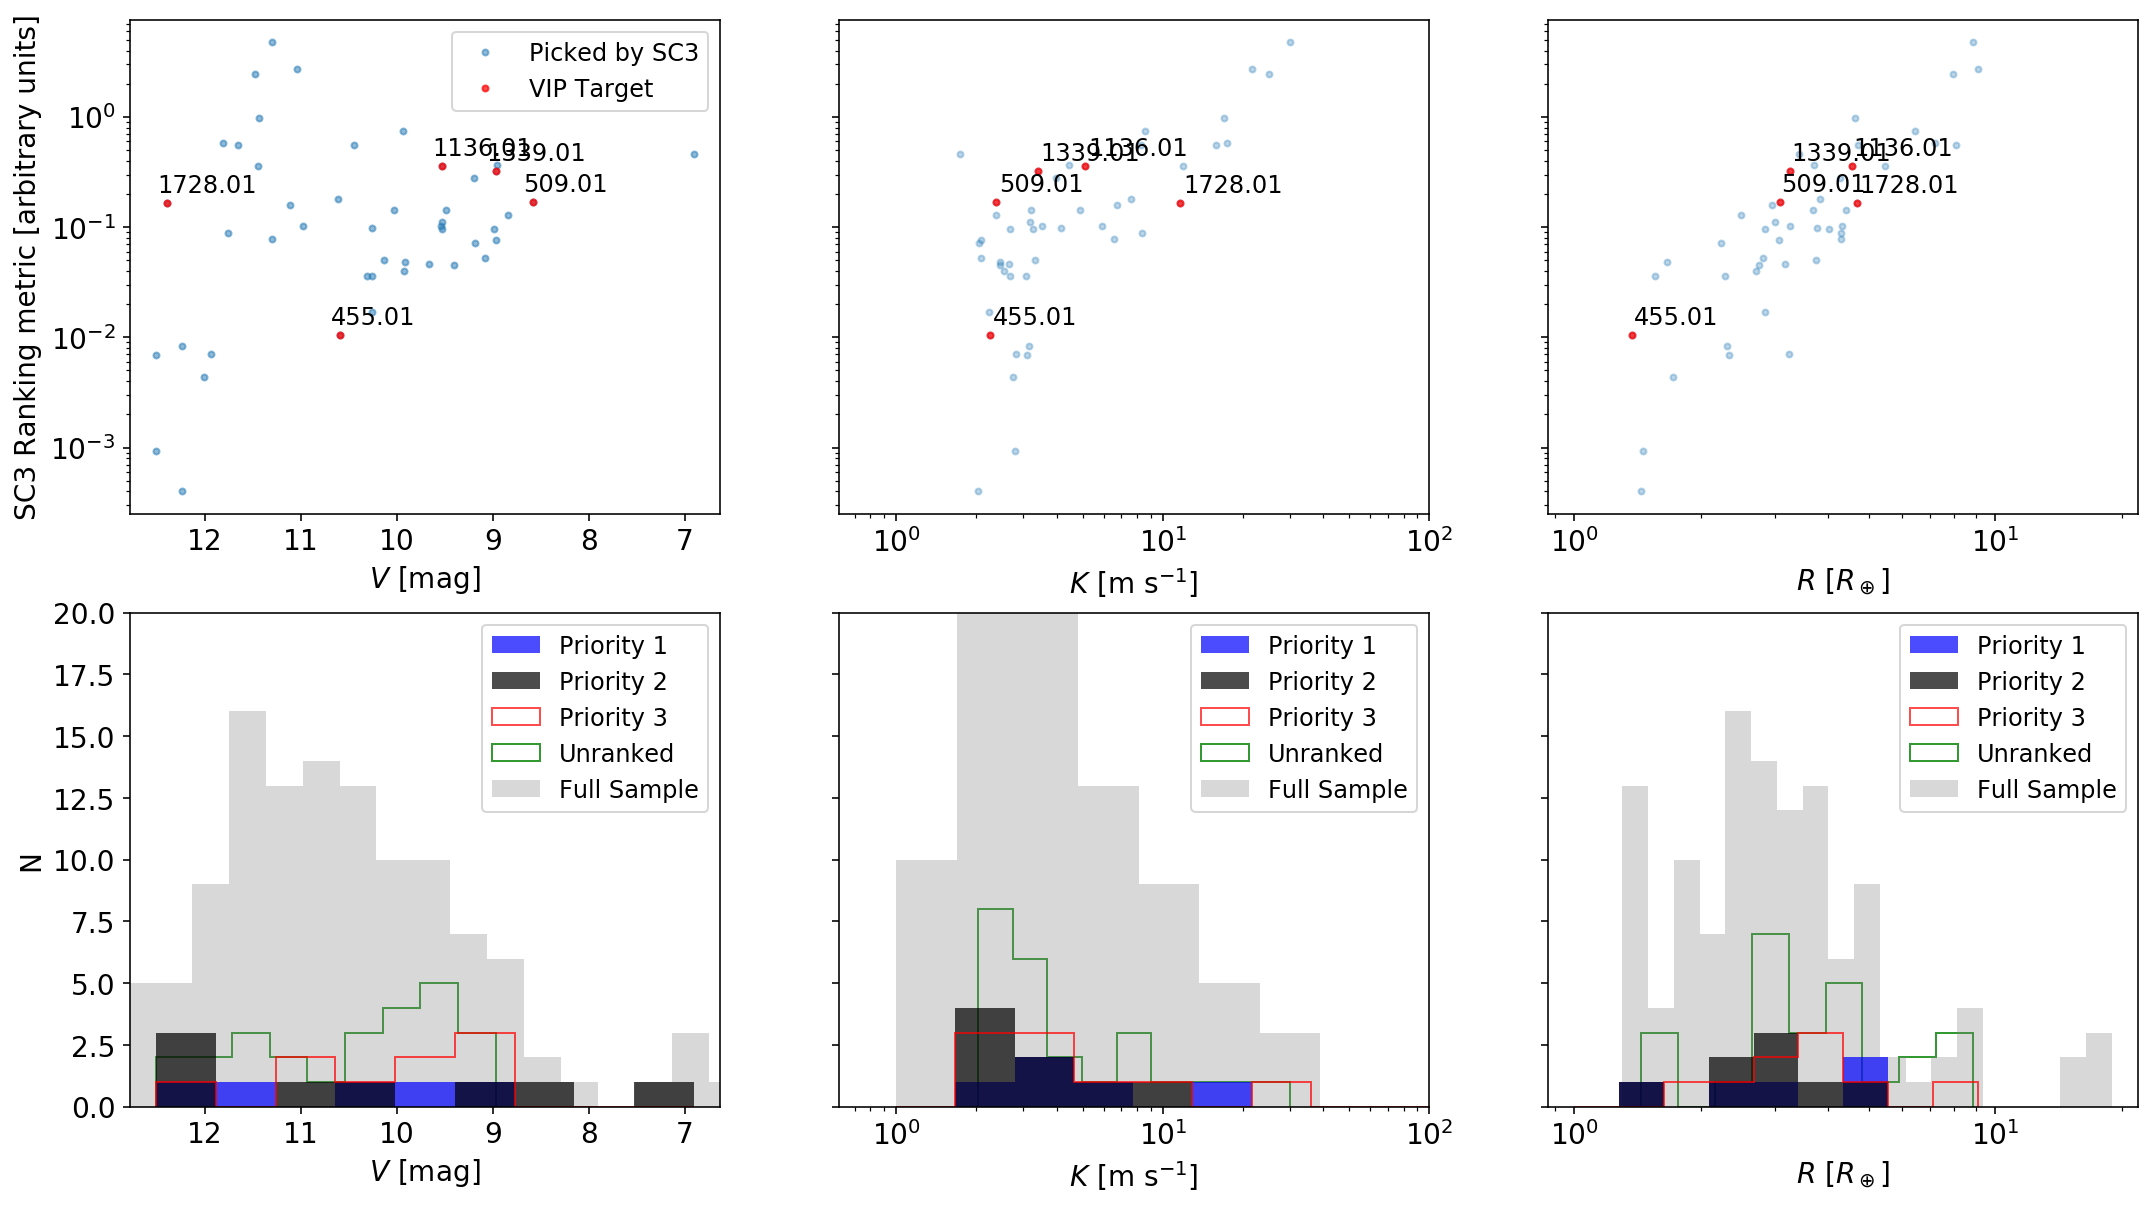

In [7]:
benchmarks = [455.01, 509.01, 1136.01, 1339.01, 1728.01]
fig, axes = summary_plot(sc3_df, benchmark_targets=benchmarks)
ax_X_vmag = axes[0,0]
ax_X_vmag.set_ylabel('SC3 Ranking metric [arbitrary units]', fontsize=14)

# Plot the distribution of all of the unranked TOIs
unranked_df = sc3_df[pd.isnull(sc3_df['X_priority'])]
_, __, ___, ax_p_vmag, ax_p_kamp, ax_p_rad = axes.flatten()
hist_axes = [ax_p_vmag, ax_p_kamp, ax_p_rad]
hist_keys = ['V mag', 'K_amp', 'Planet Radius Value']
for ax,key in zip(hist_axes, hist_keys):
    hist_bin_num = 10
    bins = None
    if key == 'V mag':
        bins = np.linspace(unranked_df[key].min(), unranked_df[key].max(), hist_bin_num)
    else:
        bins = np.logspace(np.log10(unranked_df[key].min()), np.log10(unranked_df[key].max()), hist_bin_num)
    ax.hist(unranked_df[key], bins=bins, zorder=0, alpha=0.8, histtype='step', color='green', label='Unranked'.format(len(unranked_df)))
    ax.legend(fancybox=True, fontsize=12)

hist_keys = ['vmag', 'kexp', 'rp']
for ax,key in zip(hist_axes, hist_keys):
    hist_bin_num = 20
    bins = None
    if key == 'vmag':
        bins = np.linspace(pick_tois_df[key].min(), pick_tois_df[key].max(), hist_bin_num)
    else:
        bins = np.logspace(np.log10(pick_tois_df[key].min()), np.log10(pick_tois_df[key].max()), hist_bin_num)
    ax.hist(pick_tois_df[key], bins=bins, zorder=0, alpha=0.3, histtype='stepfilled', color='gray', label='Full Sample')
    ax.legend(fancybox=True, fontsize=12)
    if key == 'kexp': 
        ax.set_xlim(right=10**2)
        ax.set_ylim(top=20)

#fig.savefig('plots/sc3_summary_plot.png', dpi=400)
plt.show()

In [13]:
for i, fig_ax in enumerate(fig_ax_list):
    fig, ax = fig_ax
    ax.set_ylabel('Stellar Effective Temperature [K]', fontsize=14)
    ax.set_xlabel(r'Insolation Flux [F$_\oplus$]', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    
    # To plot foo points for the legend
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.scatter(0, 0, color='green', label='Priority 1')
    ax.scatter(0, 0, color='yellow', label='Priority 2')
    ax.scatter(0, 0, color='orange', label='Priority 3')
    ax.scatter(0, 0, color='black', label='Unranked')
    ax.legend(fancybox=True, fontsize=14)
    
    fig.savefig('plots/sc3_binning_radius_bin_{}.png'.format(i+1), dpi=400)
    break